![k-mean clustering](./img/clustering.png)

In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [2]:
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline
%matplotlib inline

In [3]:
df = pd.read_csv(r"geocod_parcial_corrigido.csv")
df.head()

,Protocolo,Endereço,Número,Bairro,Zona,Setor,DataInclusao,Cadastro,Assunto,Descrição,Origem,Cidade,Estado,Pais,DataInclusao_BR,endereco_completo,latitude,longitude,endereco_formatado
0,649554,Alameda Amor Perfeito,36,Zona 04 - centro,60,IAM - Fiscalização,2022-11-14 22:20:00,60130700,Poluição sonora por estabelecimento comercial,Som ao vivo fora do estabelecimento provocando...,Identificados,Maringá,Paraná,Brasil,22:20:00 14-11-2022,"Alameda Amor Perfeito, 36, Maringá - PR, Brasil",-23.360488,-52.014885,Alameda Amor Perfeito - Conj. Hab. Joao de Bar...
1,601042,Alameda Das Alfazemas,1968,Zona 3,60,IAM - Fiscalização,2022-05-21 23:54:00,60067500,Poluição sonora por estabelecimento comercial,Muito barulho som alto de dois bares thel bar ...,Identificados,Maringá,Paraná,Brasil,23:54:00 21-05-2022,"Alameda Das Alfazemas, 1968, Maringá - PR, Brasil",-23.357035,-52.009594,Alameda das Alfazemas - Conj. Hab. Joao de Bar...
2,660699,Alameda Doutor João Paulino,673,JARDIM ALVORADA I PARTE,24,IAM - Fiscalização,2022-12-23 23:49:00,24130900.0,Poluição sonora por estabelecimento comercial,Vizinho vários dias com som alto além da hora....,Sigilosos,Maringá,Paraná,Brasil,23:49:00 23-12-2022,"Alameda Doutor João Paulino, 673, Maringá - PR...",-23.400397,-51.921264,"Alameda Dr. João Paulino, 673 - Jardim Alvorad..."
3,784845,Avenida Advogado Horácio Raccanello Filho,183,Vila nova,18,IAM - Fiscalização,2023-12-23 08:56:00,18039700.0,Poluição sonora por estabelecimento comercial,Esse estabelecimento permanece com o som alto ...,Sigilosos,Maringá,Paraná,Brasil,08:56:00 23-12-2023,"Avenida Advogado Horácio Raccanello Filho, 183...",-23.420447,-51.924922,"Av. Advogado Horácio Raccanello Filho, 183 - Z..."
4,648166,Avenida Advogado Horácio Raccanello Filho,3605,ZONA ARMAZÉM,9,IAM - Fiscalização,2022-11-09 08:45:00,9014300.0,Poluição sonora por estabelecimento comercial,na madrugada de terça para quarta (dia 08 para...,Sigilosos,Maringá,Paraná,Brasil,08:45:00 09-11-2022,"Avenida Advogado Horácio Raccanello Filho, 360...",-23.423895,-51.914974,"Av. Advogado Horácio Raccanello Filho, 3605 - ..."


In [4]:
x = df[["latitude", "longitude"]]
x.head()

,latitude,longitude
0,-23.360488,-52.014885
1,-23.357035,-52.009594
2,-23.400397,-51.921264
3,-23.420447,-51.924922
4,-23.423895,-51.914974


In [5]:
import numpy as np
from sklearn.cluster import OPTICS

# Seleciona latitude e longitude
x = df[["latitude", "longitude"]]

# Converte para radianos
x_rad = np.radians(x)

# Cria o modelo OPTICS (sem max_eps definido)
clustering = OPTICS(metric='haversine')

# Ajusta e gera os rótulos
df['cluster'] = clustering.fit_predict(x_rad)

# Vê a distribuição de clusters
print(df['cluster'].value_counts())


cluster
-1      459
 107    140
 123    102
 80      86
 64      74
       ... 
 62       5
 160      5
 159      5
 144      5
 98       5
Name: count, Length: 167, dtype: int64


/opt/anaconda3/envs/machine_learning/lib/python3.12/site-packages/sklearn/cluster/_optics.py:1084: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


     cluster   latitude  longitude
0          0 -23.380143 -51.967073
1          1 -23.383806 -51.952089
2          2 -23.383755 -51.951999
3          3 -23.384104 -51.952154
4          4 -23.376677 -51.958253
..       ...        ...        ...
161      161 -23.432336 -51.977404
162      162 -23.445222 -51.973393
163      163 -23.451671 -51.982688
164      164 -23.441071 -51.895595
165      165 -23.368862 -52.066304

[166 rows x 3 columns]


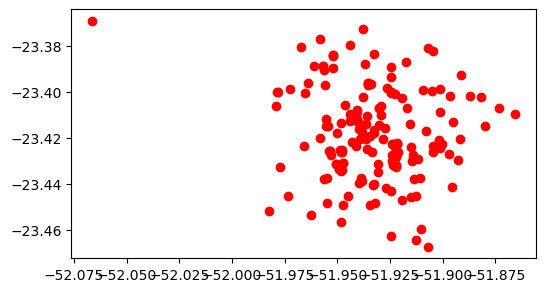

In [6]:
# ===================== CODE BLOCK 12-9 =====================
# Remove os outliers (cluster = -1)
from shapely import Point


df_clean = df[df['cluster'] != -1].copy()

# ===================== CODE BLOCK 12-10 =====================
# Calcula medianas por cluster
medians_of_POI = (
    df_clean.groupby('cluster')[['latitude', 'longitude']]
    .median()
    .reset_index(drop=False)
)

print(medians_of_POI)

# ===================== CODE BLOCK 12-11 =====================
# Cria GeoDataFrame com os centróides
medians_of_POI_gdf = gpd.GeoDataFrame(
    medians_of_POI,
    geometry=[Point(xy) for xy in zip(medians_of_POI['longitude'], medians_of_POI['latitude'])],
    crs="EPSG:4326"
)

# Plota: centróides em vermelho
ax = medians_of_POI_gdf.plot(color='red', figsize=(6,6))
plt.show()


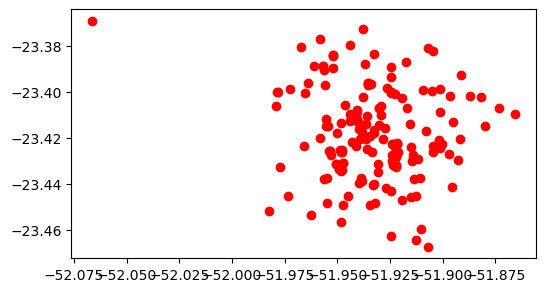

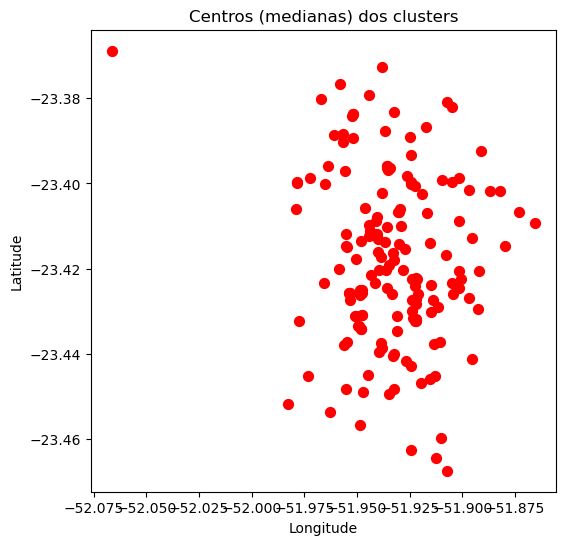

In [9]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# cria geometria dos pontos centrais
medians_of_POI_gdf = gpd.GeoDataFrame(
    medians_of_POI,
    geometry=[Point(xy) for xy in zip(medians_of_POI['longitude'], medians_of_POI['latitude'])],
    crs="EPSG:4326"   # CRS original: graus decimais WGS84
)

# opção 1: plot direto com geopandas (sem marker/color customizados)
ax = medians_of_POI_gdf.plot(color='red', figsize=(6,6))

# opção 2: plot manual com matplotlib (mais flexível)
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(medians_of_POI['longitude'], medians_of_POI['latitude'], 
            c='red', s=50, marker='o')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Centros (medianas) dos clusters")
plt.show()



In [10]:
model = KMeans(n_clusters=4)
y_kmeans = model.fit_predict(x)

In [11]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib inline

In [12]:
model = KMeans(n_clusters=4)
y_kmeans = model.fit_predict(x)

In [13]:
df['y'] = y_kmeans

In [14]:
df.head()

,Protocolo,Endereço,Número,Bairro,Zona,Setor,DataInclusao,Cadastro,Assunto,Descrição,...,Cidade,Estado,Pais,DataInclusao_BR,endereco_completo,latitude,longitude,endereco_formatado,cluster,y
0,649554,Alameda Amor Perfeito,36,Zona 04 - centro,60,IAM - Fiscalização,2022-11-14 22:20:00,60130700,Poluição sonora por estabelecimento comercial,Som ao vivo fora do estabelecimento provocando...,...,Maringá,Paraná,Brasil,22:20:00 14-11-2022,"Alameda Amor Perfeito, 36, Maringá - PR, Brasil",-23.360488,-52.014885,Alameda Amor Perfeito - Conj. Hab. Joao de Bar...,-1,0
1,601042,Alameda Das Alfazemas,1968,Zona 3,60,IAM - Fiscalização,2022-05-21 23:54:00,60067500,Poluição sonora por estabelecimento comercial,Muito barulho som alto de dois bares thel bar ...,...,Maringá,Paraná,Brasil,23:54:00 21-05-2022,"Alameda Das Alfazemas, 1968, Maringá - PR, Brasil",-23.357035,-52.009594,Alameda das Alfazemas - Conj. Hab. Joao de Bar...,-1,0
2,660699,Alameda Doutor João Paulino,673,JARDIM ALVORADA I PARTE,24,IAM - Fiscalização,2022-12-23 23:49:00,24130900.0,Poluição sonora por estabelecimento comercial,Vizinho vários dias com som alto além da hora....,...,Maringá,Paraná,Brasil,23:49:00 23-12-2022,"Alameda Doutor João Paulino, 673, Maringá - PR...",-23.400397,-51.921264,"Alameda Dr. João Paulino, 673 - Jardim Alvorad...",25,3
3,784845,Avenida Advogado Horácio Raccanello Filho,183,Vila nova,18,IAM - Fiscalização,2023-12-23 08:56:00,18039700.0,Poluição sonora por estabelecimento comercial,Esse estabelecimento permanece com o som alto ...,...,Maringá,Paraná,Brasil,08:56:00 23-12-2023,"Avenida Advogado Horácio Raccanello Filho, 183...",-23.420447,-51.924922,"Av. Advogado Horácio Raccanello Filho, 183 - Z...",-1,1
4,648166,Avenida Advogado Horácio Raccanello Filho,3605,ZONA ARMAZÉM,9,IAM - Fiscalização,2022-11-09 08:45:00,9014300.0,Poluição sonora por estabelecimento comercial,na madrugada de terça para quarta (dia 08 para...,...,Maringá,Paraná,Brasil,08:45:00 09-11-2022,"Avenida Advogado Horácio Raccanello Filho, 360...",-23.423895,-51.914974,"Av. Advogado Horácio Raccanello Filho, 3605 - ...",95,1


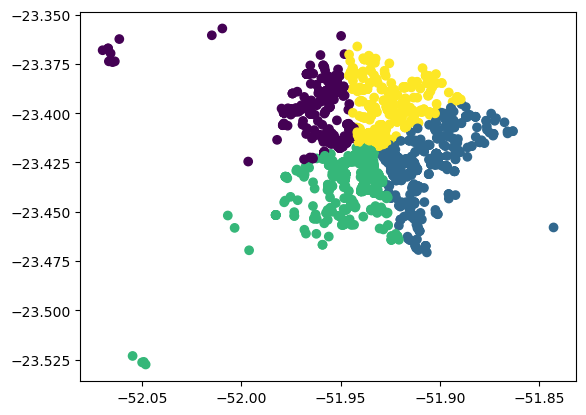

In [15]:
plt.scatter(df['longitude'], df['latitude'], c=df['y'])

In [16]:
model.inertia_

0.86119739258446

In [17]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

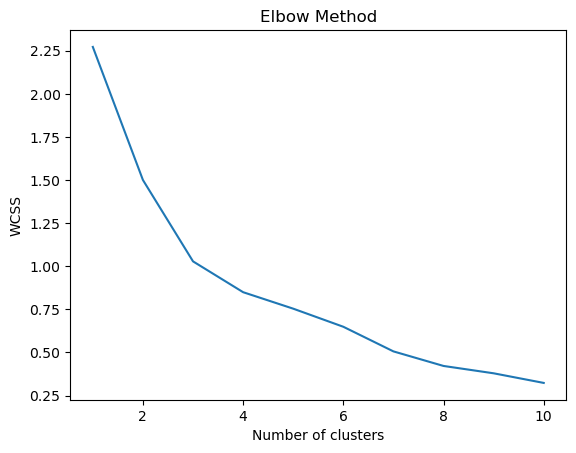

In [18]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [19]:
df = df[:2000]

cluster1 = df[['latitude', "longitude"]][df['y'] == 0].values.tolist()
cluster2 = df[['latitude', "longitude"]][df['y'] == 1].values.tolist()
cluster3 = df[['latitude', "longitude"]][df['y'] == 2].values.tolist()
cluster4 = df[['latitude', "longitude"]][df['y'] == 3].values.tolist()


In [28]:
import folium

key = "UYt1hZNFFGFt10Gokner"  # pegue no dashboard do MapTiler
map = folium.Map(location=[-23.420999, -51.933056], zoom_start=12, tiles=None)

folium.TileLayer(
    tiles=f"https://api.maptiler.com/maps/streets-v2/256/{{z}}/{{x}}/{{y}}.png?key={key}",
    attr="&copy; MapTiler &copy; OpenStreetMap contributors",
    name="MapTiler Streets",
).add_to(map)

for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)

for i in cluster4:
    folium.CircleMarker(i, radius=2,color='orange',fill_color='lightorange').add_to(map)

map  # no Jupyter
#map.save("mapa.html")  # opcional




In [30]:
import pandas as pd
import folium
from folium.plugins import TimestampedGeoJson

# 1) Ler e parsear data/hora (formato: "HH:MM:SS DD-MM-YYYY")
df = pd.read_csv("geocod_parcial_corrigido.csv")

df["DataInclusao"] = pd.to_datetime(
    df["DataInclusao_BR"],
    format="%H:%M:%S %d-%m-%Y",
    errors="coerce",
    dayfirst=True,
)

# 2) Limpeza básica
df = df.dropna(subset=["latitude", "longitude", "DataInclusao"]).copy()
df = df.sort_values("DataInclusao")

# 3) Renomear campo com acento (opcional)
if "Descrição" in df.columns:
    df = df.rename(columns={"Descrição": "Descricao"})

# 4) Construir o GeoJSON no formato que o TimestampedGeoJson espera
features = []
for _, r in df.iterrows():
    popup = (
        f"<b>Data/hora:</b> {r['DataInclusao'].strftime('%d/%m/%Y %H:%M:%S')}"
        f"<br><b>Endereço:</b> {str(r.get('endereco_completo', ''))}"
        f"<br><b>Descrição:</b> {str(r.get('Descricao', ''))}"
    )
    feat = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [float(r["longitude"]), float(r["latitude"])],
        },
        "properties": {
            # o plugin aceita 'times' (lista) ou 'time' (string); usaremos lista
            "times": [r["DataInclusao"].isoformat()],
            "popup": popup,
            # estilo do CircleMarker
            "style": {
                "radius": 5,
                "color": "#222222",
                "fillColor": "#ff4d4d",
                "fillOpacity": 0.7,
                "weight": 1,
            },
        },
    }
    features.append(feat)

geojson = {"type": "FeatureCollection", "features": features}

# 5) Criar o mapa com folium
m = folium.Map(location=[-23.42, -51.93], zoom_start=12, tiles="OpenStreetMap")

TimestampedGeoJson(
    data=geojson,
    period="P1D",                 # "PT1H" para hora-a-hora
    duration="P3D",               # rastro de 3 dias; use "PT0S" para sem rastro
    add_last_point=True,
    auto_play=True,
    loop=False,
    date_options="DD/MM/YYYY",
    time_slider_drag_update=True,
).add_to(m)

m.save("mapa_timeslider.html")